In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from mpl_toolkits.mplot3d import Axes3D

In [2]:
d = pd.read_excel('mode2.xlsx')
d.head()

,X1,X2
0,107.705,95.795
1,85.020,235.536
2,154.556,125.419
3,119.904,194.497
4,131.874,124.638


/Users/connormcdonald/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/connormcdonald/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/connormcdonald/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.

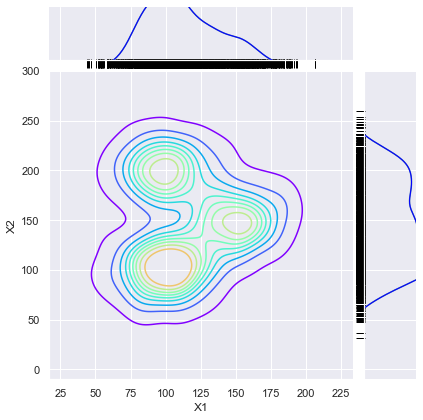

In [3]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.jointplot(x='X1',y='X2',data=d,cmap='rainbow',kind='kde').plot_marginals(sns.rugplot, height=-.15, clip_on=False, color = 'black').plot_marginals(sns.distplot, hist = False, kde = True, rug = True,
             color = 'blue', 
             kde_kws={'linewidth': 1},
             rug_kws={'color': 'black'})


In [5]:
data = []
for i in d.index:
    data.append([d['X1'][i], d['X2'][i]])

In [6]:
def cols(data, k): #calculates density of each points and its neighbors
    density = []
    nn = []
    for i in data:
        d = NearestNeighbors(n_neighbors=k)
        d.fit(data)
        neighbors = d.kneighbors([i], k, return_distance=True)
        nn.append(neighbors[1][0].tolist())
        dens = 1/(neighbors[0][0][0] - neighbors[0][0][-1])**2
        density.append(dens)
    return density, nn               

In [7]:
def knndata(data, k): #converts the data into the dataframe shown below
    col3, col4 = cols(data, k)
    col1 = []
    col2 = []
    for i in data:
        col1.append(i[0])
        col2.append(i[1])
        
    d = {'X1': col1,
         'X2': col2,
        'Density': col3,
        'Neighbors': col4}
    kd = pd.DataFrame(d, columns = ['X1','X2', 'Density', 'Neighbors'])
    
    return kd

In [8]:
def mode_search(data, k): #finds the modes with k neighbors
    knn_data = knndata(data, k)
    best_density = 0
    best_index = -1
    mode_index= []
    for i in knn_data['Neighbors']:
        n_dens = []
        n =[]
        for j in i:
            n_dens.append(knn_data['Density'][j])
            n.append(j)

        if n_dens[0] == max(n_dens):
            mode_index.append(n[np.argmax(n_dens)])
            
    return mode_index

In [9]:
def cluster(data, k): #find which mode each point converges on 
    clusters = []
    knn_data = knndata(data, k)
    modes = mode_search(data, 200)
    
    for i in range(len(knn_data['Neighbors'])):
        l = list(set(knn_data['Neighbors'][i]).intersection(modes))
        j = i

        while len(l) != 1:
            search = knn_data['Neighbors'][j]
            n_dens = []
            n = []
            for k in search:
                n_dens.append(knn_data['Density'][k])
                n.append(k)
                
            max_d = max(n_dens)
            j = n[np.argmax(n_dens)]
            l = list(set(knn_data['Neighbors'][j]).intersection(modes))
        
        clusters.append(str(l[0]))
    knn_data['Cluster'] =  clusters
    knn_data['Cluster'] = le.fit_transform(knn_data['Cluster'])
    return knn_data

In [10]:
output = cluster(data, 100)

Text(0.5, 0, 'X2')

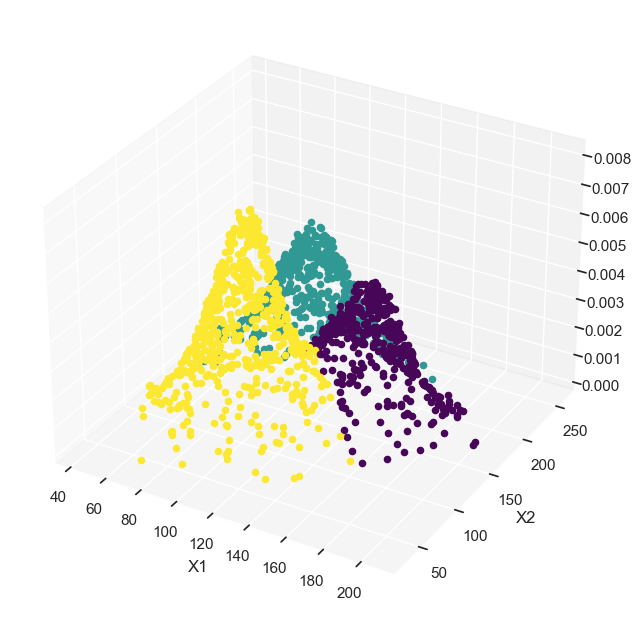

In [11]:
fig = plt.figure(figsize=(8, 8), dpi=100)
ax = fig.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('white')

colors = [[(71/255,6/255,87/255)], [(49/255,153/255,148/255)], [(253/255,232/255,49/255)]]
for i in range(len(output)):
    x, y, z = output.iloc[i]['X1'], output.iloc[i]['X2'], output.iloc[i]['Density']
    ax.scatter(x, y, z, c=colors[int(output.iloc[i]['Cluster'])])
ax.set_xlabel('X1')
ax.set_ylabel('X2')


Text(0.5, 0, 'X2')

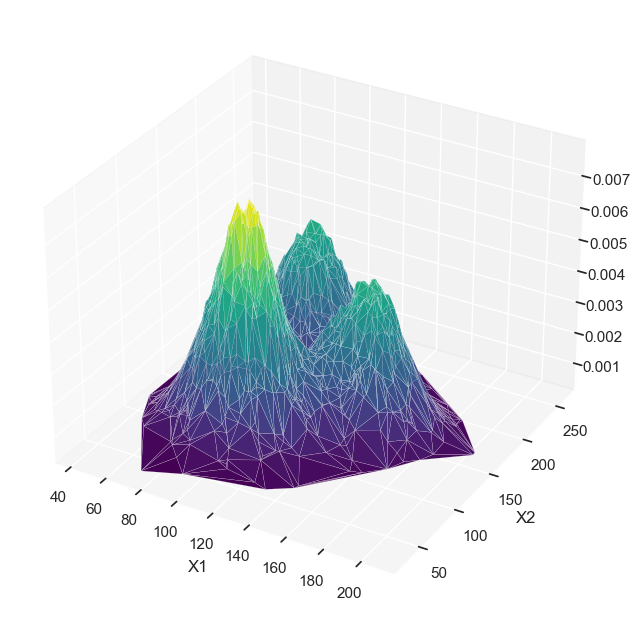

In [12]:
fig = plt.figure(figsize = (8,8),dpi=100)
ax = fig.add_subplot(111, projection = '3d')
plt.gca().patch.set_facecolor('white')
ax.plot_trisurf(output['X1'], output['X2'], output['Density'], linewidth =0.1, cmap = 'viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

In [13]:
fig = plt.figure(figsize=(8, 8), dpi=200)


colors = [[(71/255,6/255,87/255)], [(49/255,153/255,148/255)], [(253/255,232/255,49/255)]]
for i in range(len(output)):
    x, y = output.iloc[i]['X1'], output.iloc[i]['X2']
    ax.scatter(x, y, c=colors[int(output.iloc[i]['Cluster'])])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Clustering With A k-NN Density Estimator', size = 14)


Text(0.5, 0.92, 'Clustering With A k-NN Density Estimator')

<Figure size 1600x1600 with 0 Axes>